# Manipulação de Gráficos em Python

A fim de importar a biblioteca de Controle

In [ ]:
!pip install -U control
import control as co
import numpy as np
import matplotlib.pyplot as plt


     |████████████████████████████████| 348kB 29.3MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344920 sha256=b965db76e2b5135968fdb624aa3eb77a3768720ce24cb0d3cfebd1af3648a055
  Stored in directory: /root/.cache/pip/wheels/35/be/ee/081b68ca3e4b2d253fba2f7f7e51960373903fb7b6d13c5532
Successfully built control


Dos exercícios de plot de gráficos feitos em aula, apresenta-se:

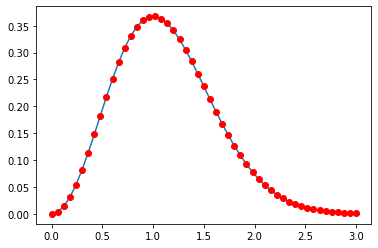

In [ ]:
def f(x):
  return x**2*np.exp(-x**2)
x = np.linspace(start = 0.
                , stop = 3
                , num = 51
                )
y = f(x)
plt.plot(x,y)
plt.plot(x,y,'ro')
plt.show()

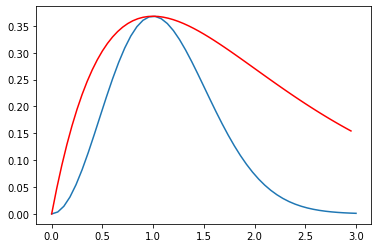

In [ ]:
def f(x):
  return x**2*np.exp(-x**2)
def g(x):
  return x*np.exp(-x)
x = np.linspace( start = 0
                , stop = 3
                , num = 51
                )
y = f(x)
plt.plot(x,y)
xx = np.arange (start = 0
                , stop = 3
                , step = 0.05
                )

yy = g(xx)
plt.plot( xx
        , yy
        , 'r-'
        )
plt.show()

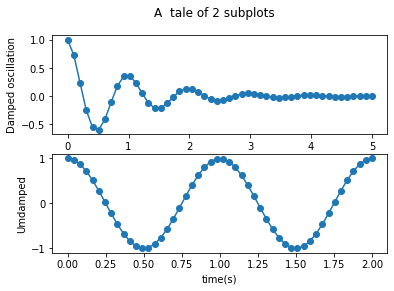

In [ ]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2*np.pi*x1)*np.exp(-x1)
y2 = np.cos(2*np.pi*x2)

fig, (ax1, ax2) = plt.subplots(2,1)
fig.suptitle('A  tale of 2 subplots')

ax1.plot(x1,y1, 'o-')
ax1.set_ylabel('Damped oscillation')

ax2.plot(x2,y2, 'o-')
ax2.set_xlabel('time(s)')
ax2.set_ylabel('Umdamped')

plt.show()

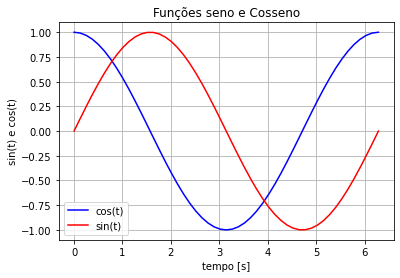

In [ ]:
x = np.linspace(start = 0
                , stop = 2*np.pi
                , num = 51)
y1 = np.cos(x)
y2 = np.sin(x)

plt.title('Funções seno e Cosseno')
plt.ylabel('sin(t) e cos(t)')
plt.xlabel('tempo [s]')
plt.plot(x, y1, 'b',x,y2,'r')
plt.legend(['cos(t)'
          , 'sin(t)'])
plt.grid()
plt.show()

# Respostas no Tempo para diferentes entradas sobre Sistemas de 2° Ordem

A fim de obter uma função python para obter a FT de 2° ordem

In [ ]:
def segunda_ordem(wn,zeta):
  return co.tf([wn**2],[1,2*zeta*wn,wn**2])

#Exemplo para amortecimento de 1 M/s e frequência natural 1 s^{-1}
segunda_ordem(1,1)

TransferFunction(array([1]), array([1, 2, 1]))

Definindo o vetor tempo a ser usado e FT impulso, aplica-se a entrada impulso para a FT exemplo acima


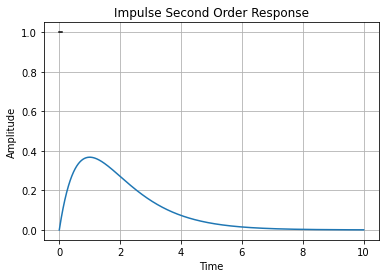

In [ ]:
t = np.linspace(0,10,num=10000)
y = np.linspace(0.000001,0.1,num=10)/np.linspace(0.000001,0.1,num=10)

(tOut,yOut) = co.impulse_response(segunda_ordem(1,1),t)

plt.plot(np.linspace(0,0.1,num=10),y,'k')
plt.plot(tOut,yOut)
plt.title('Impulse Second Order Response')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


Definindo a resposa degrau, repete-se

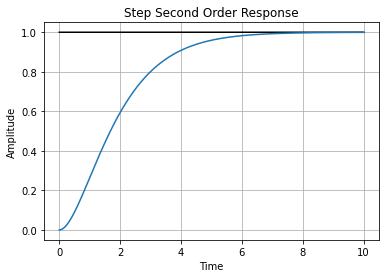

In [ ]:
t = np.linspace(0,10,num=10000)
y = np.linspace(0.000001,10,num=10000)/np.linspace(0.000001,10,num=10000)

(tOut,yOut) = co.step_response(segunda_ordem(1,1),t)

plt.plot(t,y,'k')
plt.plot(tOut,yOut)
plt.title('Step Second Order Response')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

Para obter a rampa unitária

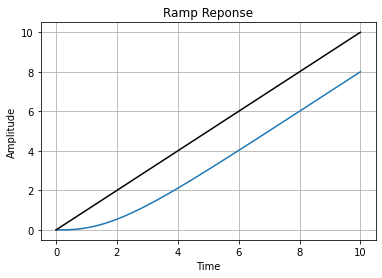

In [ ]:
integrator = co.tf([1],[1,0])
(tOut,yOut) = co.step_response(segunda_ordem(1,1)*integrator,t)
plt.plot(tOut,yOut)
plt.plot(t,t,'k')
plt.title('Ramp Reponse')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

Para obter como entrada uma parábola

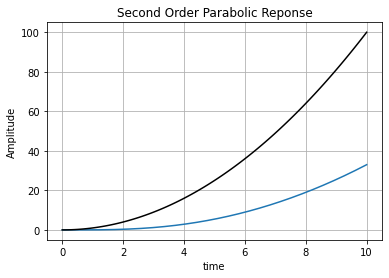

In [ ]:
(tOut,yOut) = co.step_response(segunda_ordem(1,1)*integrator*
                                     integrator,np.linspace(0,10,num=10000))
plt.plot(tOut,yOut)
plt.plot(np.linspace(0,10,num=100),np.linspace(0,10,num=100)**2,'k')
plt.title('Second Order Parabolic Reponse')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

**Exercício 1**

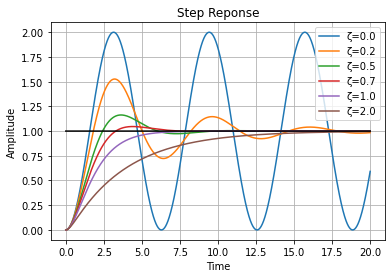

In [ ]:
t = np.linspace(0,20,num=10000)
y = np.linspace(10**-6,20,num=10000)/np.linspace(10**-6,20,num=10000)

for i in [0, 0.2, 0.5, 0.7, 1.0, 2.0]:
  (tOut,yOut) = co.step_response(segunda_ordem(1,i),
                                 np.linspace(0,20,num=10**4))
  plt.plot(tOut,yOut,label='\u03B6=%.1f' %i)
  plt.legend()
  
plt.plot(t,y,'k')
plt.title('Step Reponse')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

Repetindo a rotina acima para as entradas impulso rampa e parábola

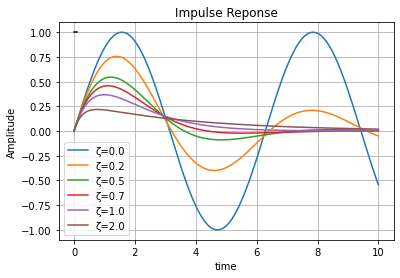

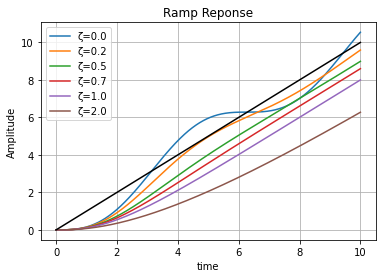

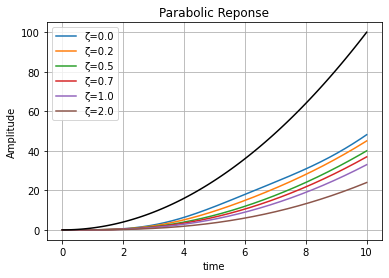

In [ ]:
for j in [0, 0.2, 0.5, 0.7, 1.0, 2.0]:
  (tOut,yOut2) = co.impulse_response(segunda_ordem(1,j),
                                     np.linspace(0,10,num=10**4))
  plt.plot(tOut,yOut2,label='\u03B6=%.1f' %j)
  plt.legend()

plt.plot(np.linspace(10**-6,0.1,num=10),
         np.linspace(10**-6,0.1,num=10)/np.linspace(10**-6,0.1,num=10),'k')
plt.title('Impulse Reponse')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

integrator = co.tf([1],[1,0])

for k in [0, 0.2, 0.5, 0.7, 1.0, 2.0]:
  (tOut,yOut3) = co.step_response(segunda_ordem(1,k)*integrator,
                                  np.linspace(0,10,num=10**4))
  plt.plot(tOut,yOut3,label='\u03B6=%.1f' %k)
  plt.legend()

plt.plot(np.linspace(10**-6,10,num=100),np.linspace(10**-6,10,num=100),'k')
plt.title('Ramp Reponse')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

for l in [0, 0.2, 0.5, 0.7, 1.0, 2.0]:
  (tOut,yOut3) = co.step_response(segunda_ordem(1,l)*integrator*
                                     integrator,np.linspace(0,10,num=10**4))
  plt.plot(tOut,yOut3,label='\u03B6=%.1f' %l)
  plt.legend()

plt.plot(np.linspace(10**-6,10,num=100),np.linspace(10**-6,10,num=100)**2,'k')
plt.title('Parabolic Reponse')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


Contruindo um gráfico para wx = 0.5,1,2 e zeta = 0.3

In [ ]:
for w in [0.5,1,2]:
  (tOut,yOut4) = co.step_response(segunda_ordem(w,0.3),
                                  np.linspace(0,10,num=10000))
  plt.plot(tOut,yOut4,label='\u03C9=%.1f' %w)
  plt.legend()

plt.plot(np.linspace(0,10,num=100),
         np.linspace(10*-6,10,num=100)/np.linspace(10*-6,10,num=100),'k')
plt.title('Step Reponse')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()